In [1]:
from mxnet import nd

X = nd.arange(16).reshape((1, 1, 4, 4))
X


[[[[ 0.  1.  2.  3.]
   [ 4.  5.  6.  7.]
   [ 8.  9. 10. 11.]
   [12. 13. 14. 15.]]]]
<NDArray 1x1x4x4 @cpu(0)>

In [2]:
# 两个提议区域：每个区域由5个元素表示，
# 分别为区域目标类别、左上角的x和y轴坐标以及右下角的x和y轴坐标。
rois = nd.array([[0, 0, 0, 20, 20], [0, 0, 10, 30, 30]])

In [3]:
# 由于X的高和宽是图像的高和宽的1/10，
# 以上两个提议区域中的坐标先按spatial_scale自乘0.1
# 然后在X上分别标出兴趣区域X[:,:,0:3,0:3]和X[:,:,1:4,0:4]
nd.ROIPooling(X, rois, pooled_size=(2, 2), spatial_scale=0.1)


[[[[ 5.  6.]
   [ 9. 10.]]]


 [[[ 9. 11.]
   [13. 15.]]]]
<NDArray 2x1x2x2 @cpu(0)>

In [5]:
!pip install gluoncv

In [6]:
from matplotlib import pyplot as plt
import gluoncv
from gluoncv import model_zoo, data, utils

In [7]:
net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)

121888KB [00:15, 7993.62KB/s]                                                                                          


In [8]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/biking.jpg?raw=true',
                          path='biking.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

100%|██████████████████████████████████████████████████████████████████████████████| 244/244 [00:00<00:00, 1294.50KB/s]


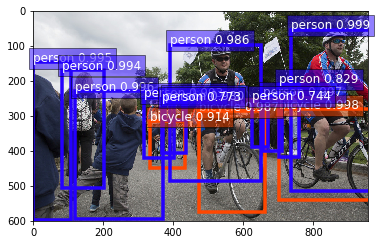

In [9]:
box_ids, scores, bboxes = net(x)
ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=net.classes)

plt.show()